In [65]:
import pandas as pd

def read_data(file='datos_entrenamiento_laboratorio1(train_data).csv'):
    df = pd.read_csv(file)
    pd.set_option('display.max_columns', None) # Mostrar todas las columnas
    return df

df = read_data()
df.head()

,Jugador,Nacionalidad,Posicion,Edad,Dia_partido,Goles,Tiros Totales,xG,npxG,xAG,xAG.1,Acciones_que_crean_tiros,Pases_intentados,Pases_intentados.1,Pases_intentados.2,Pases_progresivos,Pases_progresivos.1,Regates_exitosos,Regates_exitosos.1,Pases_medios_completados,Pases_largos_completados,xAG.2,xAG.3,xA,Pases_en_ultimo_tercio,Pases_balon_vivo,Pases_balon_muerto,Pases_al_hueco,Pases_centros,Pases_completados,Pases_completados.1,Pases_completados.2,Pases_fuera_de_juego,Valla_no_vencida,Errores_defnsivos_ocasion_tiro,Toques_en_zona_ofensiva,Toques_en_area_rival,%_de_regates_exitosos,Veces_que_fue_barrido_regate,Acarreos_ultimo_tercio,Malos_controles,Perdida_balon,Pases_recibidos,Pases_progresivos_recibidos,Faltas_cometidas,Centros,Duelos_aereos_ganados,%_de_duelos_aereos_ganados,market_value,contract_date
0,Bruno Fernandes,pt POR,"FW,AM",29-343,"Friday August 16, 2024",0,6,1.2,1.2,0.0,0.0,2,60,60,60,6,6,1,1,14,4,0.0,0.0,0.0,4,51,8,0,8,43,43,43,1,0,0,36,3,100.0,0,5,1,2,51,7,0,8,0,0.0,€50.00m,30.06.2027
1,Marcus Rashford,eng ENG,LW,26-290,"Friday August 16, 2024",0,0,0.0,0.0,0.7,0.7,1,30,30,30,2,2,0,0,2,1,0.7,0.7,0.1,2,30,0,0,1,22,22,22,0,1,0,26,4,0.0,5,1,2,1,37,9,1,1,1,100.0,€50.00m,30.06.2026
2,Amad Diallo,ci CIV,RW,22-036,"Friday August 16, 2024",0,0,0.0,0.0,0.1,0.1,1,33,33,33,1,1,1,1,6,1,0.1,0.1,0.1,1,28,4,0,2,28,28,28,1,0,0,22,3,100.0,0,4,2,2,26,7,0,2,0,0.0,-,30.06.2027
3,Amad Diallo,ci CIV,RW,22-036,"Friday August 16, 2024",-5,0,0.0,0.0,0.1,0.1,1,33,33,33,1,1,1,1,6,1,0.1,0.1,0.1,1,28,4,0,2,28,28,28,1,0,0,22,3,100.0,0,4,2,2,26,7,0,2,0,0.0,€1000.00m,30.06.2030
4,Alejandro Garnacho,ar ARG,RW,20-046,"Friday August 16, 2024",0,2,0.7,0.7,0.2,0.2,3,11,11,11,0,0,0,0,3,0,0.2,0.2,0.1,0,11,0,0,1,10,10,10,0,1,0,10,3,0.0,1,0,2,1,12,3,0,1,1,50.0,€45.00m,30.06.2028


In [66]:
df = df.drop(["Nacionalidad",
              "Posicion",
              "Edad",
              "Dia_partido",
              "contract_date"], axis=1)

In [67]:
# Columnas repetidas
df = df.drop(['xAG.1',
        'Pases_intentados.1',
        'Pases_intentados.2',
        'Pases_progresivos.1',
        'Regates_exitosos.1',
        'xAG.2',
        'xAG.3',
        'Pases_completados.1',
        'Pases_completados.2'], axis=1)

In [68]:
df = df.drop([
            'Pases_balon_vivo',
            'Pases_balon_muerto',
            'Pases_fuera_de_juego',
            'Veces_que_fue_barrido_regate',
            'Malos_controles',
            'Perdida_balon',
            'Faltas_cometidas'], axis=1)

In [69]:
df = df[df["market_value"] != "error"]


def market_value(val):
    if val=='-':
        return 0
    if pd.isna(val):
        return None
    
    val = val.strip().lower()
    
    if val.startswith("€") and (val.endswith("m") or val.endswith("k")):
        val = val.replace("€", "").strip()
        
        if val.endswith("m"):
            return float(val[:-1])
        elif val.endswith("k"):
            return float(val[:-1]) / 1000
    else:
        return None

df["market_value_million_eur"] = df["market_value"].apply(market_value)
df["market_value_million_eur"].head()

0      50.0
1      50.0
2       0.0
3    1000.0
4      45.0
Name: market_value_million_eur, dtype: float64

In [70]:
agg_dict = {
    "Goles": "sum",
    "Tiros Totales": "sum",
    "xG": "sum",
    "npxG": "sum",
    "xAG": "sum",
    "xA": "sum",
    "Acciones_que_crean_tiros": "sum",
    "Pases_intentados": "sum",
    "Pases_progresivos": "sum",
    "Regates_exitosos": "sum",
    "Pases_medios_completados": "sum",
    "Pases_largos_completados": "sum",
    "Pases_en_ultimo_tercio": "sum",
    "Pases_al_hueco": "sum",
    "Pases_centros": "sum",
    "Pases_completados": "sum",
    "Valla_no_vencida": "sum",
    "Errores_defnsivos_ocasion_tiro": "sum",
    "Toques_en_zona_ofensiva": "sum",
    "Toques_en_area_rival": "sum",
    "%_de_regates_exitosos": "mean",
    "Acarreos_ultimo_tercio": "sum",
    "Pases_recibidos": "sum",
    "Pases_progresivos_recibidos": "sum",
    "Centros": "sum",
    "Duelos_aereos_ganados": "sum",
    "%_de_duelos_aereos_ganados": "mean",
    "market_value_million_eur": "max"

}

df_ = df.groupby("Jugador", as_index=False).agg(agg_dict)
df_.head()

,Jugador,Goles,Tiros Totales,xG,npxG,xAG,xA,Acciones_que_crean_tiros,Pases_intentados,Pases_progresivos,Regates_exitosos,Pases_medios_completados,Pases_largos_completados,Pases_en_ultimo_tercio,Pases_al_hueco,Pases_centros,Pases_completados,Valla_no_vencida,Errores_defnsivos_ocasion_tiro,Toques_en_zona_ofensiva,Toques_en_area_rival,%_de_regates_exitosos,Acarreos_ultimo_tercio,Pases_recibidos,Pases_progresivos_recibidos,Centros,Duelos_aereos_ganados,%_de_duelos_aereos_ganados,market_value_million_eur
0,Aaron Ciammaglichella,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,0,0,NaN,0.7
1,Aaron Cresswell,0,5,0.2,0.2,1.3,1.9,15,612,36,1,212,58,52,1,36,504,37,0,94,2,50.000000,8,438,4,36,8,52.087500,NaN
2,Aaron Malouda,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,2,0,0,0,NaN,NaN
3,Aaron Martin,0,16,0.6,0.6,5.4,5.8,95,1685,90,12,557,160,77,0,256,1221,73,1,608,20,42.158824,31,1039,108,256,20,37.203571,6.5
4,Aaron Ramsdale,0,0,0.0,0.0,0.0,0.0,6,2446,0,0,604,514,72,0,0,1548,20,6,0,0,NaN,0,1404,0,0,12,100.000000,16.0


In [18]:
df_.to_csv("datos_procesados_test.csv", index=False)

In [71]:
df_['market_value_million_eur'].isnull().sum()

np.int64(695)

In [72]:
df_.isnull().sum()

Jugador                             0
Goles                               0
Tiros Totales                       0
xG                                  0
npxG                                0
xAG                                 0
xA                                  0
Acciones_que_crean_tiros            0
Pases_intentados                    0
Pases_progresivos                   0
Regates_exitosos                    0
Pases_medios_completados            0
Pases_largos_completados            0
Pases_en_ultimo_tercio              0
Pases_al_hueco                      0
Pases_centros                       0
Pases_completados                   0
Valla_no_vencida                    0
Errores_defnsivos_ocasion_tiro      0
Toques_en_zona_ofensiva             0
Toques_en_area_rival                0
%_de_regates_exitosos             342
Acarreos_ultimo_tercio              0
Pases_recibidos                     0
Pases_progresivos_recibidos         0
Centros                             0
Duelos_aereo

In [73]:
df_["market_value_million_eur"].describe()

count    1547.000000
mean      345.173361
std      1783.508431
min         0.000000
25%         3.000000
50%         8.000000
75%        22.000000
max      9999.990000
Name: market_value_million_eur, dtype: float64

In [74]:
df_["market_value_million_eur"].isnull().sum()

np.int64(695)

In [75]:
#filtro = df_["market_value_million_eur"].between(0.01,300)

# Contar cuántas filas cumplen la condición
count = filtro.sum()
print("Jugadores: ",count)

Jugadores:  1377


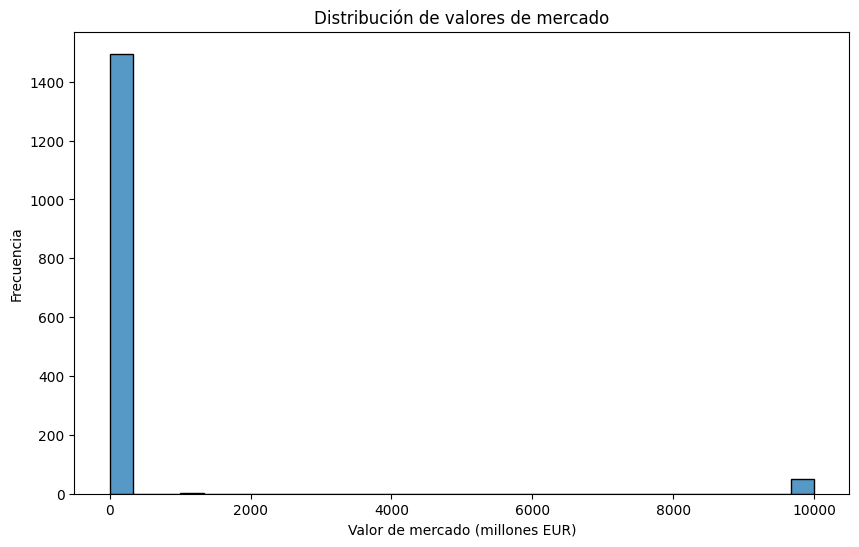

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(df_["market_value_million_eur"], bins=30, kde=False)
plt.title("Distribución de valores de mercado")
plt.xlabel("Valor de mercado (millones EUR)")
plt.ylabel("Frecuencia")
plt.show()


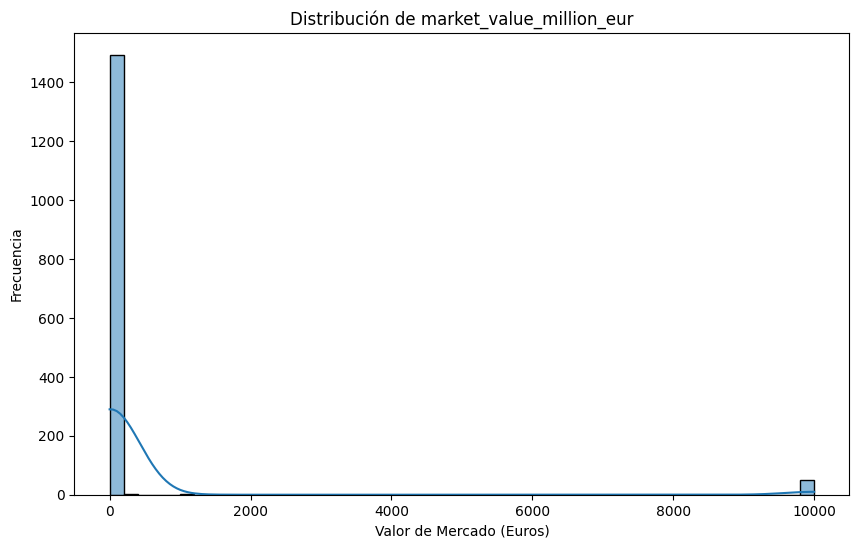

In [77]:
target_variable = 'market_value_million_eur' # Asumiendo que esta es la columna del valor de mercado actual en euros

plt.figure(figsize=(10, 6))
sns.histplot(df_[target_variable], kde=True, bins=50)
plt.title(f'Distribución de {target_variable}')
plt.xlabel('Valor de Mercado (Euros)')
plt.ylabel('Frecuencia')
plt.show()

In [78]:
df__ = df_ = df_[(df_["market_value_million_eur"] >= 1) & 
               (df_["market_value_million_eur"] <= 300)]

df__.head()

,Jugador,Goles,Tiros Totales,xG,npxG,xAG,xA,Acciones_que_crean_tiros,Pases_intentados,Pases_progresivos,Regates_exitosos,Pases_medios_completados,Pases_largos_completados,Pases_en_ultimo_tercio,Pases_al_hueco,Pases_centros,Pases_completados,Valla_no_vencida,Errores_defnsivos_ocasion_tiro,Toques_en_zona_ofensiva,Toques_en_area_rival,%_de_regates_exitosos,Acarreos_ultimo_tercio,Pases_recibidos,Pases_progresivos_recibidos,Centros,Duelos_aereos_ganados,%_de_duelos_aereos_ganados,market_value_million_eur
3,Aaron Martin,0,16,0.6,0.6,5.4,5.8,95,1685,90,12,557,160,77,0,256,1221,73,1,608,20,42.158824,31,1039,108,256,20,37.203571,6.5
4,Aaron Ramsdale,0,0,0.0,0.0,0.0,0.0,6,2446,0,0,604,514,72,0,0,1548,20,6,0,0,NaN,0,1404,0,0,12,100.000000,16.0
5,Aaron WanBissaka,2,16,0.9,0.9,3.4,2.3,95,1822,149,66,450,48,94,5,76,1475,126,0,638,48,55.870588,65,1325,167,76,22,44.304167,24.0
6,Abakar Sylla,2,10,1.0,1.0,0.2,0.0,8,1316,42,6,664,44,42,0,2,1166,126,0,52,18,60.000000,2,994,6,2,40,61.108333,10.0
7,Abdallah Sima,14,74,11.4,11.4,1.8,1.6,56,664,48,12,144,16,26,0,32,462,18,0,512,132,25.638462,32,756,184,32,82,54.760870,9.0


In [79]:
df__.count()

Jugador                           1377
Goles                             1377
Tiros Totales                     1377
xG                                1377
npxG                              1377
xAG                               1377
xA                                1377
Acciones_que_crean_tiros          1377
Pases_intentados                  1377
Pases_progresivos                 1377
Regates_exitosos                  1377
Pases_medios_completados          1377
Pases_largos_completados          1377
Pases_en_ultimo_tercio            1377
Pases_al_hueco                    1377
Pases_centros                     1377
Pases_completados                 1377
Valla_no_vencida                  1377
Errores_defnsivos_ocasion_tiro    1377
Toques_en_zona_ofensiva           1377
Toques_en_area_rival              1377
%_de_regates_exitosos             1237
Acarreos_ultimo_tercio            1377
Pases_recibidos                   1377
Pases_progresivos_recibidos       1377
Centros                  

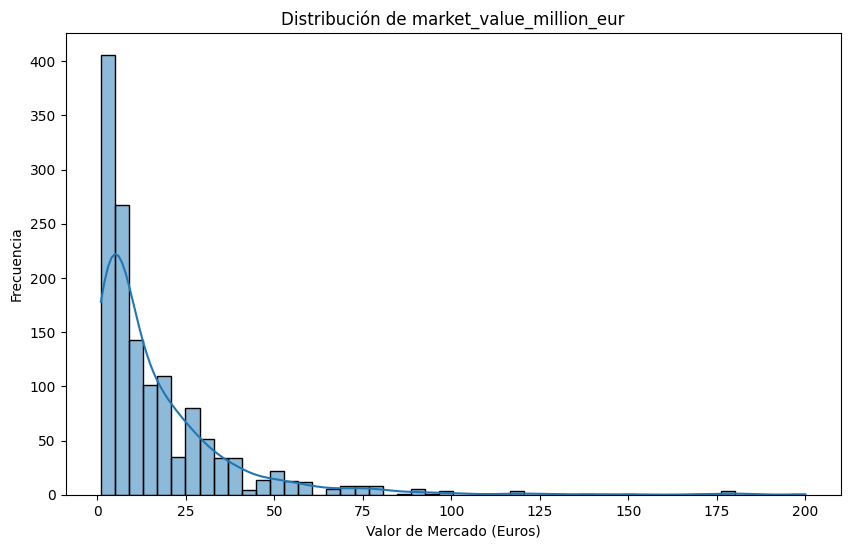

In [80]:
target_variable = 'market_value_million_eur' # Asumiendo que esta es la columna del valor de mercado actual en euros

plt.figure(figsize=(10, 6))
sns.histplot(df__[target_variable], kde=True, bins=50)
plt.title(f'Distribución de {target_variable}')
plt.xlabel('Valor de Mercado (Euros)')
plt.ylabel('Frecuencia')
plt.show()

In [81]:
df__["Jugador"].count()

np.int64(1377)